In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
X_train = X_train / 255
X_test = X_test/255

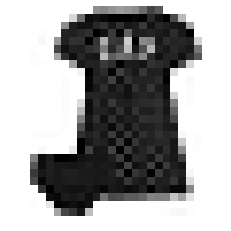

In [4]:
plt.imshow(X_train[70], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka", "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[70]]

'sukienka'

In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [8]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="sgd", metrics=["accuracy"])

In [9]:
root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_split = 0.1, callbacks = [tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 3s 1ms/step - loss: 0.7225 - accuracy: 0.7647 - val_loss: 0.5316 - val_accuracy: 0.8118
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4892 - accuracy: 0.8287 - val_loss: 0.4947 - val_accuracy: 0.8168
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8442 - val_loss: 0.4237 - val_accuracy: 0.8492
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4140 - accuracy: 0.8540 - val_loss: 0.4141 - val_accuracy: 0.8532
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3929 - accuracy: 0.8624 - val_loss: 0.3990 - val_accuracy: 0.8545
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8671 - val_loss: 0.3896 - val_accuracy: 0.8617
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3636 - accuracy: 0.8714 - val_loss: 0.3775 - val_accuracy:

Prediction: sukienka
Confidence: 0.5647089
Truth: kurtka


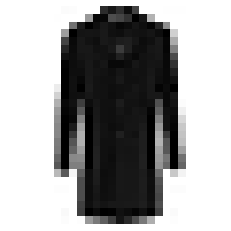

In [11]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
model.save('fashion_clf.h5')

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [16]:
model_reg = keras.models.Sequential()

model_reg.add(keras.layers.Dense(30, activation = "relu"))

In [17]:
model_reg.compile(loss=tf.keras.losses.mean_squared_error, optimizer="sgd")

In [18]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
min_delta=0.01,
verbose=1)

In [19]:
root_logdir = os.path.join(os.curdir, "housing_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cv = tf.keras.callbacks.TensorBoard(run_logdir)

In [20]:
history = model_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks = [es, tensorboard_cv])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 4.6241 - val_loss: 5.4359
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 3.8856 - val_loss: 4.1205
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 3.2295 - val_loss: 3.1528
Epoch 4/100
363/363 [==============================] - 0s 963us/step - loss: 2.6453 - val_loss: 2.4190
Epoch 5/100
363/363 [==============================] - 0s 949us/step - loss: 2.1334 - val_loss: 1.8554
Epoch 6/100
363/363 [==============================] - 0s 937us/step - loss: 1.7061 - val_loss: 1.4540
Epoch 7/100
363/363 [==============================] - 0s 935us/step - loss: 1.3851 - val_loss: 1.1818
Epoch 8/100
363/363 [==============================] - 0s 925us/step - loss: 1.1518 - val_loss: 0.9885
Epoch 9/100
363/363 [==============================] - 0s 960us/step - loss: 0.9797 - val_loss: 0.8473
Epoch 10/100
363/363 [==============================] - 0s 935us/step - loss: 0

In [21]:
model_reg.save('reg_housing_1.h5')

In [22]:
model_reg_2 = keras.models.Sequential()

model_reg_2.add(keras.layers.Dense(30, activation = "relu"))
model_reg_2.add(keras.layers.Dense(50, activation = "relu"))

In [23]:
model_reg_2.compile(loss=tf.keras.losses.mean_squared_error, optimizer="sgd")

In [24]:
history = model_reg_2.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks = [es, tensorboard_cv])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 4.1084 - val_loss: 7.3821
Epoch 2/100
363/363 [==============================] - 0s 971us/step - loss: 1.7859 - val_loss: 1.8556
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9881 - val_loss: 1.2330
Epoch 4/100
363/363 [==============================] - 0s 989us/step - loss: 0.7817 - val_loss: 0.9526
Epoch 5/100
363/363 [==============================] - 0s 945us/step - loss: 0.7036 - val_loss: 0.8152
Epoch 6/100
363/363 [==============================] - 0s 964us/step - loss: 0.6602 - val_loss: 0.7495
Epoch 7/100
363/363 [==============================] - 0s 967us/step - loss: 0.6312 - val_loss: 0.7035
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6117 - val_loss: 0.6727
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5978 - val_loss: 0.6511
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.588

In [25]:
model_reg_2.save('reg_housing_2.h5')

In [26]:
model_reg_3 = keras.models.Sequential()

model_reg_3.add(keras.layers.Dense(70, activation = "relu"))

In [27]:
model_reg_3.compile(loss=tf.keras.losses.mean_squared_error, optimizer="sgd")

In [28]:
history = model_reg_3.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks = [es, tensorboard_cv])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 4.9718 - val_loss: 5.4938
Epoch 2/100
363/363 [==============================] - 0s 953us/step - loss: 4.6279 - val_loss: 4.9791
Epoch 3/100
363/363 [==============================] - 0s 903us/step - loss: 4.2842 - val_loss: 4.4913
Epoch 4/100
363/363 [==============================] - 0s 914us/step - loss: 3.9500 - val_loss: 4.0388
Epoch 5/100
363/363 [==============================] - 0s 951us/step - loss: 3.6245 - val_loss: 3.6172
Epoch 6/100
363/363 [==============================] - 0s 909us/step - loss: 3.3086 - val_loss: 3.2300
Epoch 7/100
363/363 [==============================] - 0s 921us/step - loss: 3.0052 - val_loss: 2.8759
Epoch 8/100
363/363 [==============================] - 0s 917us/step - loss: 2.7186 - val_loss: 2.5578
Epoch 9/100
363/363 [==============================] - 0s 924us/step - loss: 2.4530 - val_loss: 2.2778
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss:

In [29]:
model_reg_3.save('reg_housing_3.h5')